# ASSIGNMENT 2
#### ANWESHA PAUL <BR> MDS202213

In [22]:
# Importing necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Problem 7

Download the 3 images in the folder named from the following folder https://drive.google.com/drive/folders/1h8ofYR9nqjXzX_2j0QrM1E-vC_yNeYsU?usp=drive_link. We want to find a homography that maps image1.jpg to image2.jpg.

(a) For this, select sets of four point correspondences on the two images, store them in two arrays called pts1 and pts2 respectively. Display these arrays clearly.<br>
(b) Compute a homography that maps image1 to image2 using DLT (you may use the inbuilt SVD function, but not the inbuilt function for computing DLT or homography). The system of equations being used to solve for elements of the homography must be clearly stated. What is the rank of the matrix of this system?<br>
(c) Compare your result with results of using the function findHomography in OpenCV.<br>
(d) Observe how the homography affects the other parts of the image. Can you explain why?

In [2]:
# Load images
image1 = cv2.imread('image1.jpg')
image2 = cv2.imread('image2.jpg')

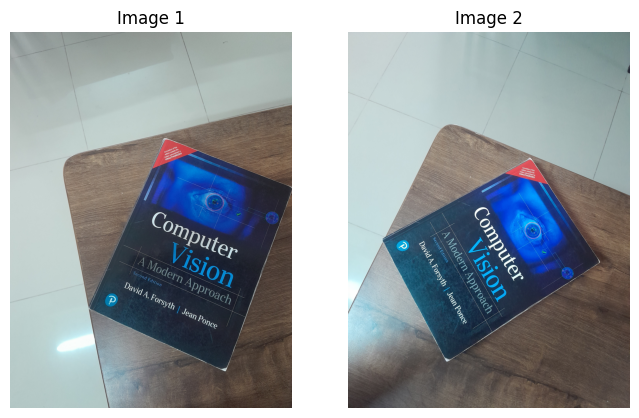

In [50]:
# Display input images 
fig, axes = plt.subplots(1, 2, figsize=(8,6))

axes[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
axes[0].set_title('Image 1')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
axes[1].set_title('Image 2')
axes[1].axis('off')

plt.show()

In [23]:
def display_image_with_points_image(image_path):
    '''
        Function to display an image and get points_image from the user
    '''

    # Define mouse click event handler
    def get_mouse_click(event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            print(f"Clicked at ({x}, {y})")
            clicked_points_image.append((x, y))
        
    # Read the image
    image = cv2.imread(image_path)
    display_image = image.copy()

    # Create a named window and set mouse event callback
    cv2.namedWindow("Image")
    cv2.setMouseCallback("Image", get_mouse_click)

    # Initialize list to store clicked points
    global clicked_points_image
    clicked_points_image = []

    # Display the image and handle mouse events
    while True:
        cv2.imshow("Image", display_image)
        key = cv2.waitKey(1) & 0xFF
        if key == ord('q'):
            break

    cv2.destroyAllWindows()

    # Display the image using matplotlib and overlay clicked points
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Click on points_image")
    plt.axis("off")

    for point in clicked_points_image:
        plt.plot(point[0], point[1], 'ro')

    plt.show()

    return clicked_points_image

Clicked at (2231, 1861)
Clicked at (2483, 1984)
Clicked at (1972, 2384)
Clicked at (2151, 2467)


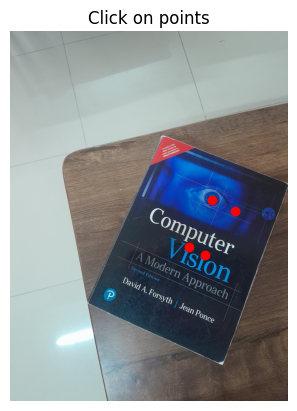

In [82]:
points_image = display_image_with_points_image("image1.jpg")

Clicked at (2018, 2165)
Clicked at (2134, 2400)
Clicked at (1526, 2412)
Clicked at (1620, 2564)


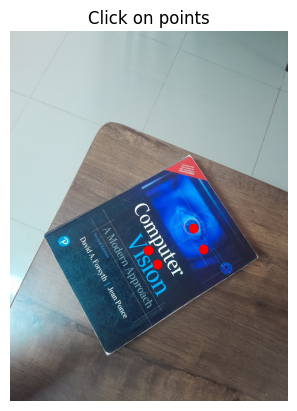

In [83]:
points_image2 = display_image_with_points_image("image2.jpg")

In [84]:
print("Set of points_image from image 1:")
print(points_image)

print("\nSet of points_image from image 2:")
print(points_image2)

Set of points from image 1:
[(2231, 1861), (2483, 1984), (1972, 2384), (2151, 2467)]

Set of points from image 2:
[(2018, 2165), (2134, 2400), (1526, 2412), (1620, 2564)]


In [34]:
def compute_homography(points_image, points_image2):
    A = []
    for pt1, pt2 in zip(points_image, points_image2):  # Remove unnecessary indexing
        x1, y1 = pt1  # Remove indexing here
        x2, y2 = pt2  # Remove indexing here
        
        A.append([x1, y1, 1, 0, 0, 0, -x2*x1, -x2*y1, -x2])
        A.append([0, 0, 0, x1, y1, 1, -y2*x1, -y2*y1, -y2])

    A = np.array(A)
    U, S, Vt = np.linalg.svd(A)
    
    # Last column of V is the right singular vector corresponding to smallest singular value
    homography = Vt[-1].reshape(3, 3)

    return A, homography

In [108]:
# Compute homography
A, homography = compute_homography(points_image, points_image2)

print("Homography Matrix (H):")
print(homography)

Homography Matrix (H):
[[ 5.75742003e-04 -2.03797311e-04  3.28511057e-01]
 [ 4.68561987e-04  6.57029732e-04 -9.44499520e-01]
 [ 5.13273567e-08  8.19101294e-08  3.44414010e-04]]


In [109]:
# Apply homography transformation to the entire input image
height, width = image1.shape[:2]
transformed_image = cv2.warpPerspective(image1, homography, (width, height))

In [110]:
# Rank of the coefficient matrix A
rank_A = np.linalg.matrix_rank(A)

print("\nRank of Coefficient Matrix (A):", rank_A)


Rank of Coefficient Matrix (A): 8


In [113]:
# Compute homography using OpenCV's findHomography function
homography_opencv, _ = cv2.findHomography(np.array(points_image), np.array(points_image2))

print("\nHomography Matrix (OpenCV findHomography):")
print(homography_opencv)


Homography Matrix (OpenCV findHomography):
[[ 1.67165674e+00 -5.91721895e-01  9.53826056e+02]
 [ 1.36046146e+00  1.90767423e+00 -2.74233768e+03]
 [ 1.49028074e-04  2.37824615e-04  1.00000000e+00]]


In [114]:
# Apply homography transformation to the entire input image
height, width = image1.shape[:2]
transformed_image2 = cv2.warpPerspective(image1, homography_opencv, (width, height))

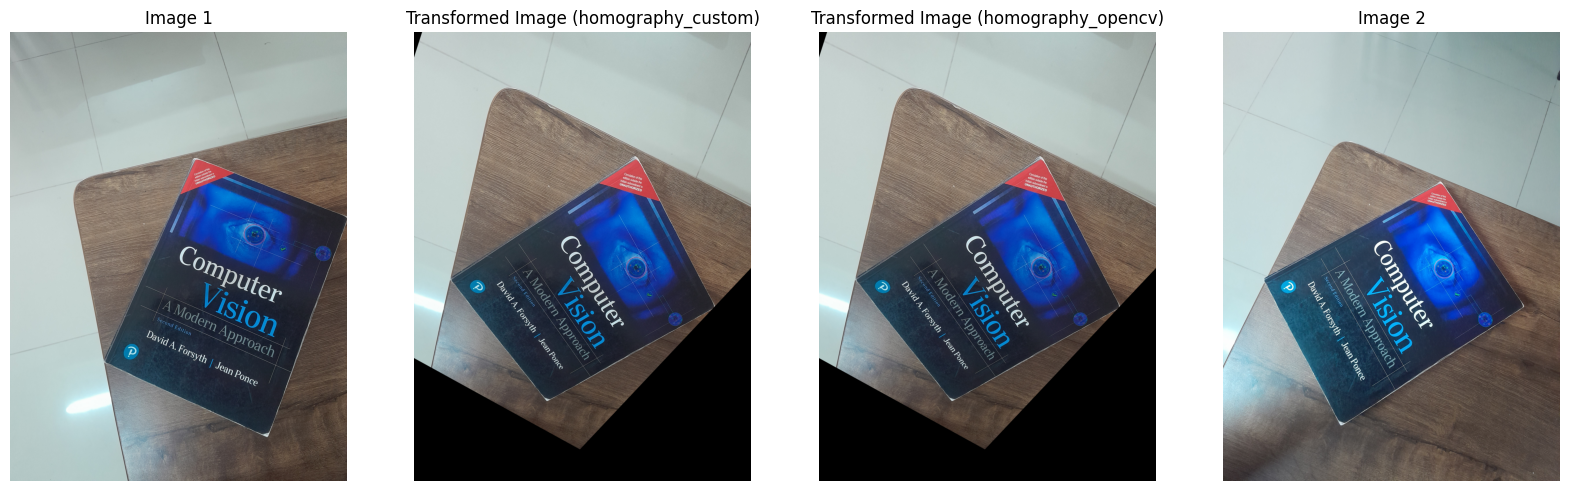

In [115]:
# Display images with highlighted corresponding points_image
fig, axes = plt.subplots(1, 4, figsize=(20,6))

axes[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
axes[0].set_title('Image 1')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Transformed Image (homography_custom)')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(transformed_image2, cv2.COLOR_BGR2RGB))
axes[2].set_title('Transformed Image (homography_opencv)')
axes[2].axis('off')

axes[3].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
axes[3].set_title('Image 2')
axes[3].axis('off')

plt.show()

### Problem 8

Use the code in the above exercise to find a homography that ‘straightens’ image1 as follows: you are given that the aspect ratio (height/width) of the book is 9/6.75. Mark and store the 4 corner points of the book in image1; choose 4 points in the destination image that you will map the chosen points to (keeping the aspect ratio in mind). Then compute the homography and apply it to image1. The resulting image should be akin to what is seen in image3.

Clicked at (1687, 1165)
Clicked at (3037, 1685)
Clicked at (2343, 3683)
Clicked at (862, 3000)


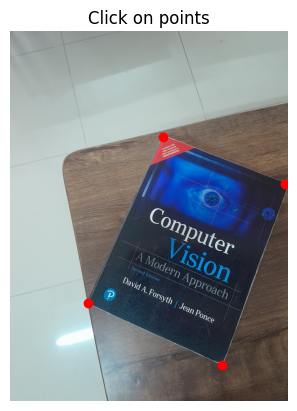

In [5]:
points_image = display_image_with_points_image("image1.jpg")

In [6]:
def straighten_image(image1, points_image):

    # Corner points_image of the book in image1
    src_pts = np.array(points_image, dtype=np.float32)

    # Aspect ratio of the book
    aspect_ratio = 9 / 6.75

    dest_width = image1.shape[1]  #assuming the destination image has the same width as the source image
    dest_height = int(dest_width * aspect_ratio)

    dest_pts = np.array([[0, 0], [dest_width, 0], [dest_width, dest_height], [0, dest_height]], dtype=np.float32)

    # Compute homography
    homography_matrix, _ = cv2.findHomography(src_pts, dest_pts)

    # Apply homography to image1
    straightened_image = cv2.warpPerspective(image1, homography_matrix, (dest_width, dest_height))

    return straightened_image

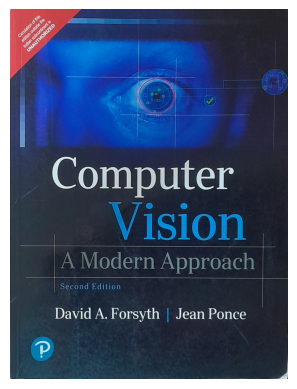

In [7]:
straightened_image = straighten_image(image1, points_image)

# Display straightened image
plt.imshow(cv2.cvtColor(straightened_image, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.show()